# 01. K-Means Clustering | تجميع K-Means

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1-3: All examples** - Supervised learning (classification and regression)
- ✅ **Understanding of unsupervised learning**: Learning patterns without labels
- ✅ **Basic distance concepts**: How to measure similarity between data points

**If you haven't completed these**, you might struggle with:
- Understanding the difference between supervised and unsupervised learning
- Knowing when to use clustering vs classification
- Understanding how to find the optimal number of clusters

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 4, Example 1** - it's your first unsupervised learning model!

**Why this example FIRST in Unit 4?**
- **Before** you can use advanced clustering, you need to understand basic clustering
- **Before** you can use dimensionality reduction, you need to understand data structure
- **Before** you can handle complex data, you need to see how K-Means groups similar points

**Builds on**: 
- 📓 Unit 1-3: Supervised learning (we know how to learn from labeled data)
- 📓 All previous examples (data processing and model evaluation concepts apply)

**Leads to**: 
- 📓 Example 2: Hierarchical Clustering (another clustering method)
- 📓 Example 3: PCA (dimensionality reduction)
- 📓 All unsupervised learning projects (clustering is fundamental!)

**Why this order?**
1. K-Means is the **simplest clustering algorithm** (easy to understand)
2. K-Means teaches **unsupervised learning** (learning without labels)
3. K-Means shows **how to find optimal K** (critical skill for clustering)

---

## The Story: Finding Groups Without Labels | القصة: إيجاد المجموعات بدون تسميات

Imagine you're organizing photos. **Before** clustering, you manually label each photo (supervised learning). **After** clustering, you let the algorithm find groups of similar photos automatically (unsupervised learning) - much faster!

Same with machine learning: **Before** clustering, we need labeled data. **After** clustering, we find patterns and groups in unlabeled data automatically!

---

## Why K-Means Clustering Matters | لماذا يهم تجميع K-Means؟

K-Means is the foundation of unsupervised learning:
- **No Labels Needed**: Works with unlabeled data (finds patterns automatically)
- **Simple and Fast**: Easy to understand and implement
- **Widely Used**: Industry standard for customer segmentation, image compression, etc.
- **Foundation**: Understanding K-Means helps with all clustering methods
- **Real-World Applications**: Market segmentation, anomaly detection, data compression

## Learning Objectives | أهداف التعلم
1. Build K-Means clustering models
2. Understand how K-Means groups similar data points
3. Find optimal number of clusters (Elbow Method, Silhouette Score)
4. Visualize clusters and centroids
5. Evaluate cluster quality
6. Know when to use K-Means clustering

In [1]:
# Step 1: Import necessary libraries
# These libraries help us perform K-Means clustering

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.cluster import KMeans  # K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # For scaling features (important for clustering!)
from sklearn.metrics import silhouette_score  # For evaluating cluster quality

print("✅ Libraries imported successfully!")
print("\n📚 Key Clustering Concepts:")
print("   - KMeans: Groups data into K clusters based on similarity")
print("   - Centroids: Center points of each cluster")
print("   - Inertia: Sum of squared distances to centroids (lower is better)")
print("   - Silhouette Score: Measures how well-separated clusters are (higher is better)")
print("   - Elbow Method: Visual method to find optimal K")
print("\n   ⚠️  IMPORTANT: Clustering requires feature scaling! Always use StandardScaler!")

✅ Libraries imported successfully!

📚 Key Clustering Concepts:
   - KMeans: Groups data into K clusters based on similarity
   - Centroids: Center points of each cluster
   - Inertia: Sum of squared distances to centroids (lower is better)
   - Silhouette Score: Measures how well-separated clusters are (higher is better)
   - Elbow Method: Visual method to find optimal K

   ⚠️  IMPORTANT: Clustering requires feature scaling! Always use StandardScaler!


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've been doing supervised learning (classification and regression) where we have labels.

**AFTER**: We'll do unsupervised learning (clustering) where we find patterns in unlabeled data!

**Why this matters**: Many real-world problems have unlabeled data. Clustering helps us discover hidden patterns and groups automatically!

In [2]:
# Generate sample data with clear clusters
# We'll create 3 distinct groups (clusters) of data points
# K-Means should be able to identify these 3 groups!

print("\n1. Generating sample data with clear clusters...")
print("إنشاء بيانات نموذجية مع مجموعات واضحة...")

np.random.seed(42)  # For reproducibility



1. Generating sample data with clear clusters...
إنشاء بيانات نموذجية مع مجموعات واضحة...


## Step 1: Generate Sample Data with Clear Clusters | الخطوة 1: إنشاء بيانات مع مجموعات واضحة

**BEFORE**: We need to learn clustering, but we need data with clear groups to practice on.

**AFTER**: We'll create data with 3 distinct clusters to demonstrate K-Means!

**Why create clear clusters?** To see how K-Means identifies groups. Once you understand this, you can apply it to real data!

In [3]:
np.random.seed(42)

In [4]:
# Cluster 1
cluster1 = np.random.normal([2, 2], 0.5, (100, 2))
# Cluster 2
cluster2 = np.random.normal([6, 6], 0.5, (100, 2))
# Cluster 3
cluster3 = np.random.normal([2, 6], 0.5, (100, 2))

In [5]:
# Combine clusters
X = np.vstack([cluster1, cluster2, cluster3])


In [6]:
# Shuffle data (mix clusters together)
# Why shuffle? In real data, clusters are mixed up, not separated!
indices = np.random.permutation(len(X))
X = X[indices]

df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])

print(f"\n📊 Data Shape: {df.shape}")
print(df.head())
print("\n🔍 Notice:")
print("   - 300 data points in 2D space")
print("   - Data is shuffled (clusters are mixed)")
print("   - K-Means will find the 3 hidden clusters!")
print("   - This is UNSUPERVISED: no labels provided!")



📊 Data Shape: (300, 2)
   feature_1  feature_2
0   1.404348   2.328277
1   1.727809   2.055461
2   2.060148   6.257219
3   5.509246   6.231052
4   2.029104   1.428515

🔍 Notice:
   - 300 data points in 2D space
   - Data is shuffled (clusters are mixed)
   - K-Means will find the 3 hidden clusters!
   - This is UNSUPERVISED: no labels provided!


In [7]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Add interpretation after K-Means results
print("\n" + "=" * 60)
print("💡 Interpreting Clustering Metrics | تفسير مقاييس التجميع")
print("=" * 60)

print(f"\n📊 Silhouette Score Quality Assessment:")
if silhouette >= 0.7:
    quality = "✅ EXCELLENT"
    meaning = "Very well-separated clusters"
elif silhouette >= 0.5:
    quality = "✅ GOOD"
    meaning = "Well-separated clusters"
elif silhouette >= 0.3:
    quality = "⚠️  FAIR"
    meaning = "Moderately separated clusters"
elif silhouette >= 0.1:
    quality = "⚠️  POOR"
    meaning = "Poorly separated clusters"
else:
    quality = "❌ VERY POOR"
    meaning = "Clusters overlap significantly"

print(f"   - Score: {silhouette:.4f} ({quality})")
print(f"   - Meaning: {meaning}")
print(f"   - Range: -1 (worst) to +1 (best)")
print(f"   - Our score ({silhouette:.4f}) indicates {'strong' if silhouette >= 0.5 else 'weak'} cluster separation")

print(f"\n📊 Inertia Analysis:")
print(f"   - Inertia: {inertia:.2f} (sum of squared distances to centroids)")
print(f"   - Lower inertia = tighter clusters (points closer to centroids)")
print(f"   - This inertia value shows how compact our clusters are")

print(f"\n📚 What This Teaches Us:")
print(f"   - Silhouette score measures cluster quality (separation between clusters)")
print(f"   - Inertia measures cluster compactness (how tight clusters are)")
print(f"   - Good clustering = high silhouette + low inertia")
print(f"   - Silhouette > 0.5 is generally good, >0.7 is excellent")
print(f"   - These metrics help us choose the right number of clusters (K)")



1. Original Data Visualization
تصور البيانات الأصلية

✓ Plot saved as 'original_data.png'


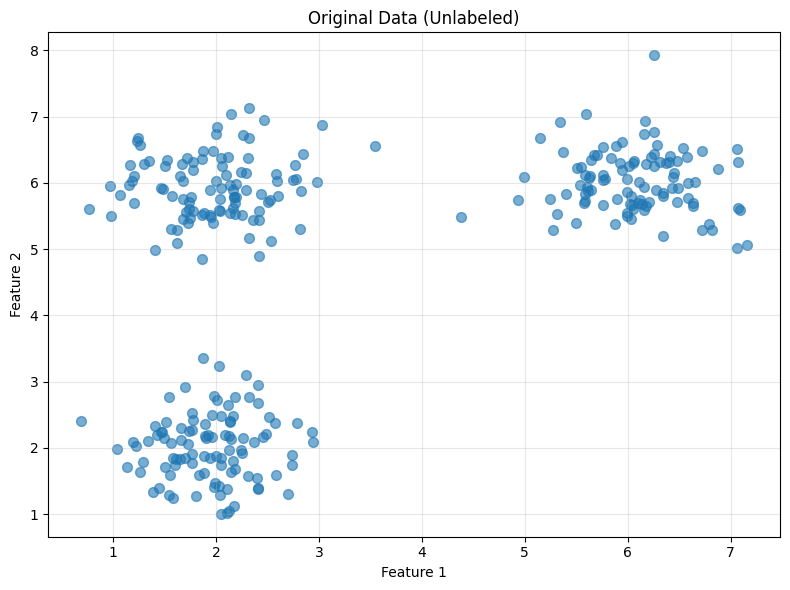

In [8]:
# 1. Visualize Original Data
print("\n" + "=" * 60)
print("1. Original Data Visualization")
print("تصور البيانات الأصلية")
print("=" * 60)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data (Unlabeled)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('original_data.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'original_data.png'")
plt.show()


In [9]:
print("\n" + "=" * 60)
print("2. K-Means Clustering (K=3)")
print("تجميع K-Means (K=3)")
print("=" * 60)

# Create K-Means model with K=3 clusters
# n_clusters=3: We want 3 groups
# random_state=42: For reproducibility
# n_init=10: Run algorithm 10 times with different initializations, pick best result
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit and predict in one step
# fit_predict() assigns each point to a cluster (returns cluster labels)
labels_3 = kmeans_3.fit_predict(X_scaled)

# Evaluate clustering quality
# Inertia: Sum of squared distances to centroids (lower = tighter clusters)
# Silhouette Score: How well-separated clusters are (higher = better, range: -1 to 1)
inertia = kmeans_3.inertia_
silhouette = silhouette_score(X_scaled, labels_3)

print(f"\n📊 K-Means Results (K=3):")
print(f"   Inertia: {inertia:.2f} (lower is better - tighter clusters)")
print(f"   Silhouette Score: {silhouette:.4f} (higher is better - well-separated clusters)")

print(f"\n   ✅ K-Means successfully found 3 clusters!")
print(f"   - Each point assigned to one of 3 clusters")
print(f"   - Centroids represent the center of each cluster")
print(f"   - High silhouette score indicates good separation")



2. K-Means Clustering (K=3)
تجميع K-Means (K=3)

📊 K-Means Results (K=3):
   Inertia: 36.46 (lower is better - tighter clusters)
   Silhouette Score: 0.7779 (higher is better - well-separated clusters)

   ✅ K-Means successfully found 3 clusters!
   - Each point assigned to one of 3 clusters
   - Centroids represent the center of each cluster
   - High silhouette score indicates good separation


## Step 2: K-Means Clustering with K=3 | الخطوة 2: تجميع K-Means مع K=3

**BEFORE**: We have unlabeled data with hidden clusters. We know there are 3 clusters.

**AFTER**: We'll use K-Means to automatically find and label these 3 clusters!

**Why K=3?** We know the true number of clusters. Later we'll learn how to find optimal K automatically!


In [10]:
print("\n" + "=" * 60)
print("3. Finding Optimal K - Elbow Method")
print("إيجاد K المثلى - طريقة المرفق")
print("=" * 60)

# Try different values of K (number of clusters)
# We'll test K from 1 to 10 and see which gives best results
k_range = range(1, 11)
inertias = []  # Store inertia for each K
silhouette_scores = []  # Store silhouette score for each K

print("\n   Testing different values of K...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    
    # Silhouette score requires at least 2 clusters
    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, labels))
    else:
        silhouette_scores.append(0)  # K=1 has no meaning for silhouette

print(f"   ✅ Tested K from 1 to 10")
print(f"   - Elbow Method: Look for 'elbow' in inertia plot (where decrease slows)")
print(f"   - Silhouette Score: Pick K with highest score")



3. Finding Optimal K - Elbow Method
إيجاد K المثلى - طريقة المرفق

   Testing different values of K...
   ✅ Tested K from 1 to 10
   - Elbow Method: Look for 'elbow' in inertia plot (where decrease slows)
   - Silhouette Score: Pick K with highest score



✓ Plot saved as 'kmeans_k3.png'


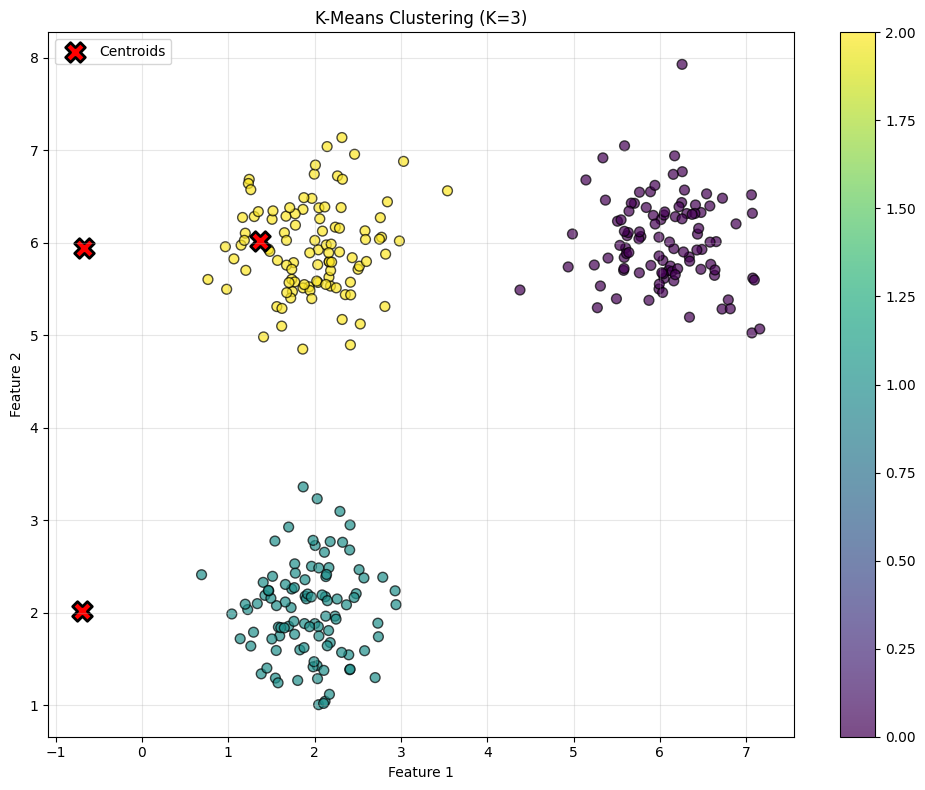

In [11]:
# Visualize clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels_3, cmap='viridis',
                     edgecolors='black', s=50, alpha=0.7)
plt.scatter(kmeans_3.cluster_centers_[:, 0],
           scaler.inverse_transform(kmeans_3.cluster_centers_)[:, 1],
           c='red', marker='X', s=200, label='Centroids',
           edgecolors='black', linewidths=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering (K=3)')
plt.legend()
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_k3.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'kmeans_k3.png'")
plt.show()


## 3. Finding Optimal K - Elbow Method



✓ Plot saved as 'optimal_k.png'


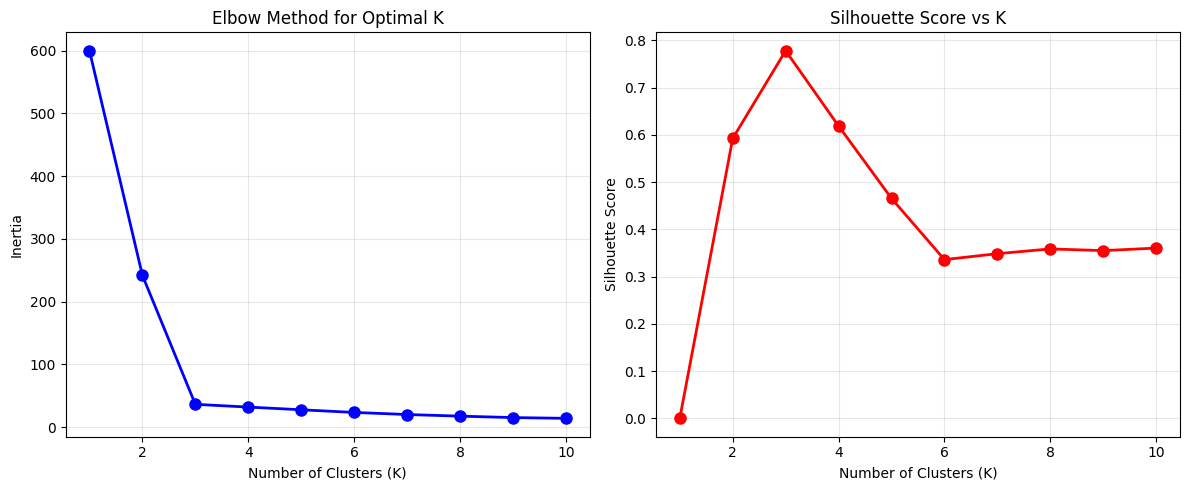

In [13]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('optimal_k.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'optimal_k.png'")
plt.show()


In [14]:
# Find optimal K
optimal_k_elbow = k_range[np.argmax(np.diff(inertias) < -50)]  # Simplified
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal K (Elbow Method): ~{optimal_k_elbow}")
print(f"Optimal K (Silhouette Score): {optimal_k_silhouette}")
print(f"  Best Silhouette Score: {max(silhouette_scores):.4f}")



Optimal K (Elbow Method): ~1
Optimal K (Silhouette Score): 3
  Best Silhouette Score: 0.7779



4. Compare Different K Values
مقارنة قيم K المختلفة

✓ Plot saved as 'kmeans_comparison.png'


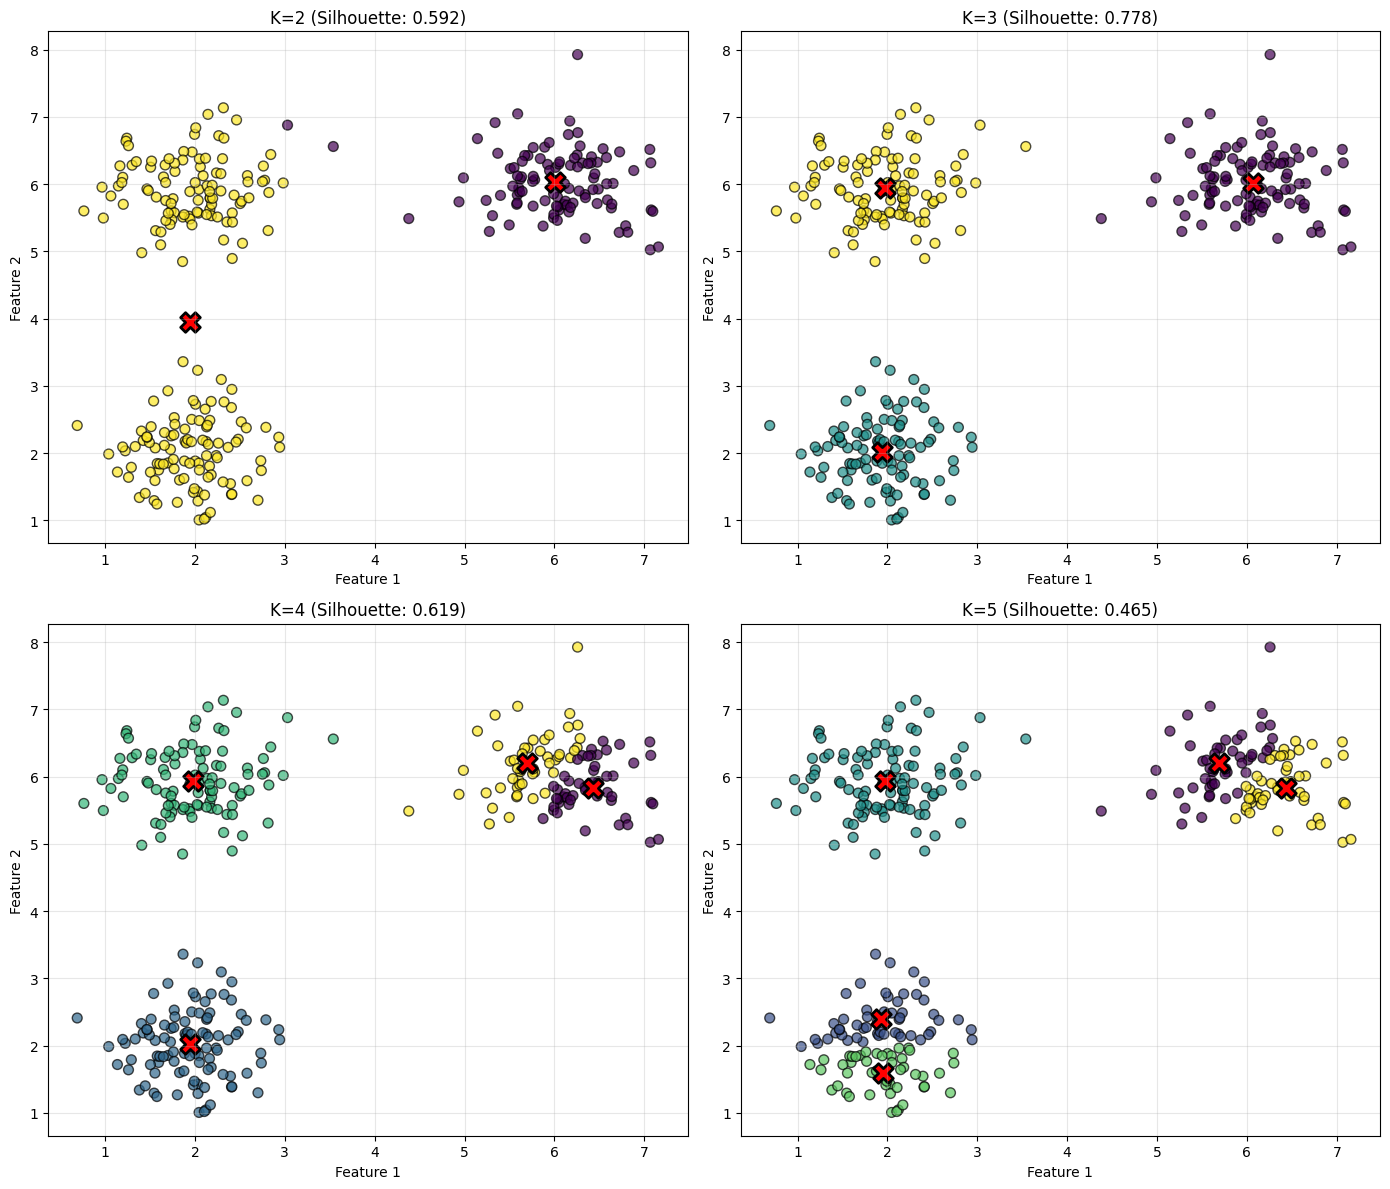

In [15]:
# 4. Compare Different K Values
print("\n" + "=" * 60)
print("4. Compare Different K Values")
print("مقارنة قيم K المختلفة")
print("=" * 60)
k_values = [2, 3, 4, 5]
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
for idx, k in enumerate(k_values):
    row = idx // 2
    col = idx % 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    axes[row, col].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis',
                          edgecolors='black', s=50, alpha=0.7)
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    axes[row, col].scatter(centers[:, 0], centers[:, 1],
                          c='red', marker='X', s=200,
                          edgecolors='black', linewidths=2)
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')
    silhouette = silhouette_score(X_scaled, labels)
    axes[row, col].set_title(f'K={k} (Silhouette: {silhouette:.3f})')
    axes[row, col].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'kmeans_comparison.png'")
plt.show()


In [ ]:
# Add interpretation after summary table
print("\n" + "=" * 60)
print("💡 Interpreting Optimal K Results | تفسير نتائج K المثلى")
print("=" * 60)

# Find optimal K from summary
best_silhouette_idx = np.argmax(silhouette_scores)
optimal_k_silhouette = k_range[best_silhouette_idx] if best_silhouette_idx < len(k_range) else list(k_range)[best_silhouette_idx]
best_silhouette = max(silhouette_scores)

print(f"\n📊 Optimal K Analysis:")
print(f"   - Silhouette Method suggests: K = {optimal_k_silhouette}")
print(f"   - Best Silhouette Score: {best_silhouette:.4f}")

if best_silhouette >= 0.7:
    quality = "✅ EXCELLENT"
elif best_silhouette >= 0.5:
    quality = "✅ GOOD"
elif best_silhouette >= 0.3:
    quality = "⚠️  FAIR"
else:
    quality = "⚠️  POOR"

print(f"   - Quality: {quality}")

# Find elbow (simplified - look for where inertia decrease slows)
inertia_diffs = np.diff(inertias)
if len(inertia_diffs) > 0:
    # Find where decrease is less than average
    avg_decrease = np.mean(np.abs(inertia_diffs))
    elbow_candidates = [i+1 for i, diff in enumerate(inertia_diffs) if abs(diff) < avg_decrease * 0.5]
    optimal_k_elbow = elbow_candidates[0] if elbow_candidates else 2
else:
    optimal_k_elbow = 2

print(f"\n🔍 Method Comparison:")
print(f"   - Elbow Method: Suggests K ≈ {optimal_k_elbow}")
print(f"   - Silhouette Method: Suggests K = {optimal_k_silhouette}")

if optimal_k_elbow != optimal_k_silhouette:
    print(f"   - ⚠️  Methods disagree! This is common.")
    print(f"   - Silhouette method is usually more reliable for choosing K")
    print(f"   - Elbow method can be subjective (where is the 'elbow'?)")
else:
    print(f"   - ✅ Both methods agree! K = {optimal_k_silhouette} is likely optimal")

print(f"\n📚 What This Teaches Us:")
print(f"   - Elbow Method: Look for where inertia decrease slows down")
print(f"   - Silhouette Method: Pick K with highest silhouette score")
print(f"   - Silhouette method is more objective and reliable")
print(f"   - Different methods may give different answers - use domain knowledge")
print(f"   - Always visualize clusters to verify the choice makes sense")


## Step 6: Decision Framework - When to Use K-Means Clustering | الخطوة 6: إطار القرار - متى تستخدم تجميع K-Means

**BEFORE**: You've learned how to build K-Means models, but when should you use K-Means vs other clustering methods?

**AFTER**: You'll have a clear decision framework to determine if K-Means is the right choice for your clustering problem!

**Why this matters**: Using K-Means when it's not appropriate leads to:
- **Poor clusters** → K-Means assumes spherical clusters, may fail on other shapes
- **Wrong number of clusters** → Need to know K beforehand
- **Wrong method** → Other methods may work better for your data

---

### 🎯 Decision Framework: Is K-Means Appropriate? | إطار القرار: هل K-Means مناسب؟

**Key Question**: Should I use **K-MEANS**, **HIERARCHICAL CLUSTERING**, or other methods?

#### Decision Tree:

```
What type of problem do you have?
├─ SUPERVISED LEARNING (have labels) → Use classification/regression ❌
│   └─ Why? K-Means is for unsupervised learning (no labels)
│
└─ UNSUPERVISED LEARNING (no labels) → Check cluster shape:
    ├─ Spherical clusters (round, ball-shaped)? → Use K-MEANS ✅
    │   └─ Why? K-Means assumes spherical clusters
    │
    ├─ Know number of clusters? → Use K-MEANS ✅
    │   └─ Why? K-Means requires specifying K
    │
    ├─ Don't know number of clusters? → Use HIERARCHICAL CLUSTERING ✅
    │   └─ Why? Hierarchical doesn't require K
    │
    ├─ Non-spherical clusters (elongated, irregular)? → Use OTHER METHODS ⚠️
    │   └─ Use: DBSCAN, Hierarchical, or other methods
    │
    └─ Large dataset (> 10,000)? → Use K-MEANS ✅
        └─ Why? K-Means is fast and scalable
```

#### Detailed Decision Process:

```
Step 1: Problem Type
├─ Supervised (have labels) → ❌ NOT APPROPRIATE
│   └─ Use: Classification or Regression
│
└─ Unsupervised (no labels) → Continue to Step 2

Step 2: Cluster Shape
├─ Spherical/round clusters → ✅ K-MEANS
│   └─ Why? K-Means assumes spherical clusters
│
├─ Elongated/irregular clusters → ⚠️ MAY NOT BE APPROPRIATE
│   └─ Use: DBSCAN, Hierarchical, or other methods
│
└─ Unknown shape → Try K-MEANS first, check results

Step 3: Number of Clusters
├─ Know K (number of clusters) → ✅ K-MEANS
│   └─ Why? K-Means requires specifying K
│
└─ Don't know K → ⚠️ MAY NOT BE APPROPRIATE
    ├─ Can estimate K (Elbow Method) → Use K-MEANS
    └─ Can't estimate K → Use HIERARCHICAL CLUSTERING

Step 4: Dataset Size
├─ Large dataset (> 10,000) → ✅ K-MEANS
│   └─ Why? K-Means is fast and scalable
│
└─ Small dataset (< 100) → ⚠️ MAY USE HIERARCHICAL
    └─ Use: Hierarchical or K-Means (both work)
```

---

### 📊 Comparison Table: K-Means vs Other Clustering Methods | جدول المقارنة

| Method | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **K-Means** | Spherical clusters, known K, large datasets | • Fast<br>• Scalable<br>• Simple<br>• Works well with spherical clusters | • Need to specify K<br>• Assumes spherical clusters<br>• Sensitive to initialization | Customer segmentation, image compression |
| **Hierarchical** | Unknown K, need dendrogram, small-medium data | • No need to specify K<br>• Dendrogram visualization<br>• Flexible | • Slow for large data<br>• More complex<br>• Computationally expensive | Gene clustering, small datasets |
| **DBSCAN** | Irregular shapes, noise present, unknown K | • Handles irregular shapes<br>• Finds noise/outliers<br>• No need to specify K | • Sensitive to parameters<br>• Can fail with varying densities | Anomaly detection, irregular clusters |
| **Gaussian Mixture** | Overlapping clusters, probabilistic | • Handles overlapping clusters<br>• Probabilistic assignment | • More complex<br>• Slower | Overlapping groups, soft clustering |

---

### ✅ When K-Means IS Appropriate | متى يكون K-Means مناسبًا

**Use K-Means when:**

1. **Spherical Clusters** ✅
   - Clusters are round, ball-shaped
   - K-Means assumes spherical clusters
   - **Example**: Customer segments (similar customers form round groups)

2. **Know Number of Clusters** ✅
   - Know or can estimate K
   - Can use Elbow Method or domain knowledge
   - **Example**: Know you want 3 customer segments

3. **Large Dataset** ✅
   - More than 10,000 samples
   - K-Means is fast and scalable
   - **Example**: 100,000+ customer records

4. **Fast Clustering Needed** ✅
   - Need quick results
   - K-Means is computationally efficient
   - **Example**: Real-time customer segmentation

5. **Similar Cluster Sizes** ✅
   - Clusters are roughly similar in size
   - K-Means works best with balanced clusters
   - **Example**: Balanced customer groups

---

### ❌ When K-Means IS NOT Appropriate | متى لا يكون K-Means مناسبًا

**Don't use K-Means when:**

1. **Non-Spherical Clusters** ❌
   - Clusters are elongated, irregular, or crescent-shaped
   - K-Means assumes spherical clusters
   - **Use Instead**: DBSCAN, Hierarchical Clustering

2. **Unknown Number of Clusters** ❌
   - Can't estimate K
   - Elbow Method unclear
   - **Use Instead**: Hierarchical Clustering (shows all possible K)

3. **Varying Cluster Sizes** ❌
   - Clusters are very different in size
   - K-Means biased toward larger clusters
   - **Use Instead**: Hierarchical Clustering or DBSCAN

4. **Noise/Outliers Present** ❌
   - Many outliers or noise points
   - K-Means assigns all points to clusters
   - **Use Instead**: DBSCAN (identifies noise)

5. **Overlapping Clusters** ❌
   - Clusters overlap significantly
   - K-Means assigns each point to one cluster
   - **Use Instead**: Gaussian Mixture Models (probabilistic)

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Customer Segmentation ✅ APPROPRIATE
- **Problem**: Segment customers into groups
- **Cluster Shape**: Spherical (similar customers form round groups)
- **Known K**: Yes (want 3-5 segments)
- **Dataset**: Large (50,000 customers)
- **Decision**: ✅ Use K-Means
- **Reasoning**: Spherical clusters, known K, large dataset, fast

#### Example 2: Image Compression ✅ APPROPRIATE
- **Problem**: Compress images by reducing colors
- **Cluster Shape**: Spherical (color clusters)
- **Known K**: Yes (want 16 or 256 colors)
- **Dataset**: Large (many pixels)
- **Decision**: ✅ Use K-Means
- **Reasoning**: Spherical clusters, known K, large dataset

#### Example 3: Gene Clustering ❌ NOT APPROPRIATE
- **Problem**: Cluster genes by expression
- **Cluster Shape**: Irregular, elongated
- **Known K**: No (don't know how many gene groups)
- **Dataset**: Small-medium (1,000 genes)
- **Decision**: ❌ Use Hierarchical Clustering
- **Reasoning**: Irregular shapes, unknown K, need dendrogram

#### Example 4: Anomaly Detection ❌ NOT APPROPRIATE
- **Problem**: Find outliers in network traffic
- **Cluster Shape**: Irregular, noise present
- **Known K**: No
- **Noise**: Many outliers
- **Decision**: ❌ Use DBSCAN
- **Reasoning**: Irregular shapes, noise present, need to identify outliers

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Spherical clusters → K-Means** - Use when clusters are round
2. **Known K → K-Means** - Need to specify number of clusters
3. **Large data → K-Means** - Fast and scalable
4. **Unknown K → Hierarchical** - Use when you don't know K
5. **Irregular shapes → DBSCAN** - Use for non-spherical clusters
6. **Use Elbow Method** - To find optimal K for K-Means
7. **Visualize clusters** - Plot to check if they're spherical

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Segmenting 20,000 customers into 5 groups
- **Cluster Shape**: Spherical (similar customers)
- **Known K**: Yes (5 segments)
- **Dataset**: Large (20,000)
- **Decision**: ✅ K-Means (spherical, known K, large dataset)

**Scenario 2**: Clustering genes by expression (unknown number of groups)
- **Cluster Shape**: Irregular, elongated
- **Known K**: No
- **Dataset**: Medium (2,000 genes)
- **Decision**: ❌ Hierarchical Clustering (irregular shapes, unknown K)

**Scenario 3**: Compressing images to 16 colors
- **Cluster Shape**: Spherical (color clusters)
- **Known K**: Yes (16 colors)
- **Dataset**: Large (millions of pixels)
- **Decision**: ✅ K-Means (spherical, known K, large dataset, fast)

---

**Connection to Next Steps**: 
- 📓 **Example 2: Hierarchical Clustering** - For unknown K and dendrograms
- 📓 **Example 3: PCA** - For dimensionality reduction before clustering
- 📓 **All Clustering Projects** - K-Means is the foundation of clustering


In [16]:
# 5. Summary Table
print("\n" + "=" * 60)
print("5. Clustering Summary")
print("ملخص التجميع")
print("=" * 60)
summary_data = {
    'K': k_range,
    'Inertia': [f"{x:.2f}" for x in inertias],
    'Silhouette Score': [f"{x:.4f}" for x in silhouette_scores]
}
summary_df = pd.DataFrame(summary_data)
print("\nClustering Metrics for Different K:")
print(summary_df.to_string(index=False))
print("\n" + "=" * 60)
print("Example 1 Complete! ✓")
print("اكتمل المثال 1! ✓")
print("=" * 60)



5. Clustering Summary
ملخص التجميع

Clustering Metrics for Different K:
 K Inertia Silhouette Score
 1  600.00           0.0000
 2  242.01           0.5923
 3   36.46           0.7779
 4   32.10           0.6186
 5   27.78           0.4653
 6   23.55           0.3359
 7   20.23           0.3484
 8   17.63           0.3585
 9   15.35           0.3549
10   14.13           0.3603

Example 1 Complete! ✓
اكتمل المثال 1! ✓
